## Загрузим нужные библиотеки

In [19]:
!pip install catboost
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from scipy.stats import uniform
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf 
from sklearn.feature_selection import SelectKBest 
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif , f_classif, mutual_info_classif
import pickle
from sklearn.naive_bayes import MultinomialNB
import catboost as cb
from sklearn.metrics import roc_auc_score ,recall_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.models import load_model
from tensorflow import keras
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("train_frame.csv",low_memory=False)
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,area,oper_type_fail,type_fail,priority_fail,total_qty_over_index_area,sum_label,percent_loss,weightkg,is_wrong,total_mean
0,6818780,26,17235,18,1,1,0.0,2,0,87.0,5.0,1.0,0.0,2.0,0.00,0.0,46654,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,182,0,0,0,2.748856e+11,826,3.004886e-09,0.0,0,0.093974
1,9907176,20,23,4,1,1,0.0,1,0,107.0,5.0,1.0,0.0,2.0,0.00,0.0,194484,68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0,3,0,0,0,3.484228e+14,109350,3.138428e-10,0.0,0,0.966056
2,3304275,15,16331,19,1,1,0.0,2,0,50.0,5.0,1.0,0.0,2.0,0.00,0.0,92224,56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0,175,0,0,0,3.939877e+12,741,1.880769e-10,0.0,1,0.122929
3,9020937,16,6325,19,1,1,0.0,2,0,416.0,5.0,1.0,0.0,2.0,35.34,0.0,79671,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0,93,0,0,0,6.073324e+11,345,5.680579e-10,0.0,0,0.138747
4,3082311,17,17315,18,1,1,0.0,2,0,795.0,5.0,1.0,0.0,2.0,52.52,0.0,141303,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0,183,0,0,0,4.110716e+10,253,6.154645e-09,1.0,0,0.073070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630659,4276133,15,18,19,3,1,0.0,1,0,62.0,5.0,1.0,0.0,2.0,0.00,0.0,128178,1000.0,600.0,184.0,67541214.0,7870.0,67549084.0,72981134.0,0,0,0,0,0,3,0,0,0,3.484228e+14,109350,3.138428e-10,0.0,0,0.925569
2630660,6687150,11,11449,19,1,1,0.0,2,0,23.0,5.0,1.0,0.0,2.0,0.00,0.0,20636,22.0,50.0,315.0,6900306.0,1421787.0,8322093.0,13893124.0,0,0,0,0,0,133,0,0,0,5.492107e+12,416,7.574507e-11,0.0,0,0.599008
2630661,4831544,19,23,4,1,1,0.0,1,0,88.0,5.0,0.0,0.0,2.0,0.00,0.0,111829,79.0,196.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0,3,0,0,0,3.484228e+14,109350,3.138428e-10,0.0,0,0.966056
2630662,2414099,17,18,19,3,1,0.0,1,0,50.0,5.0,0.0,0.0,2.0,0.00,0.0,97867,50.0,113.0,153.0,89268735.0,6799759.0,96068494.0,101200378.0,0,1,1,0,0,3,0,0,0,3.484228e+14,109350,3.138428e-10,0.0,2,0.949290


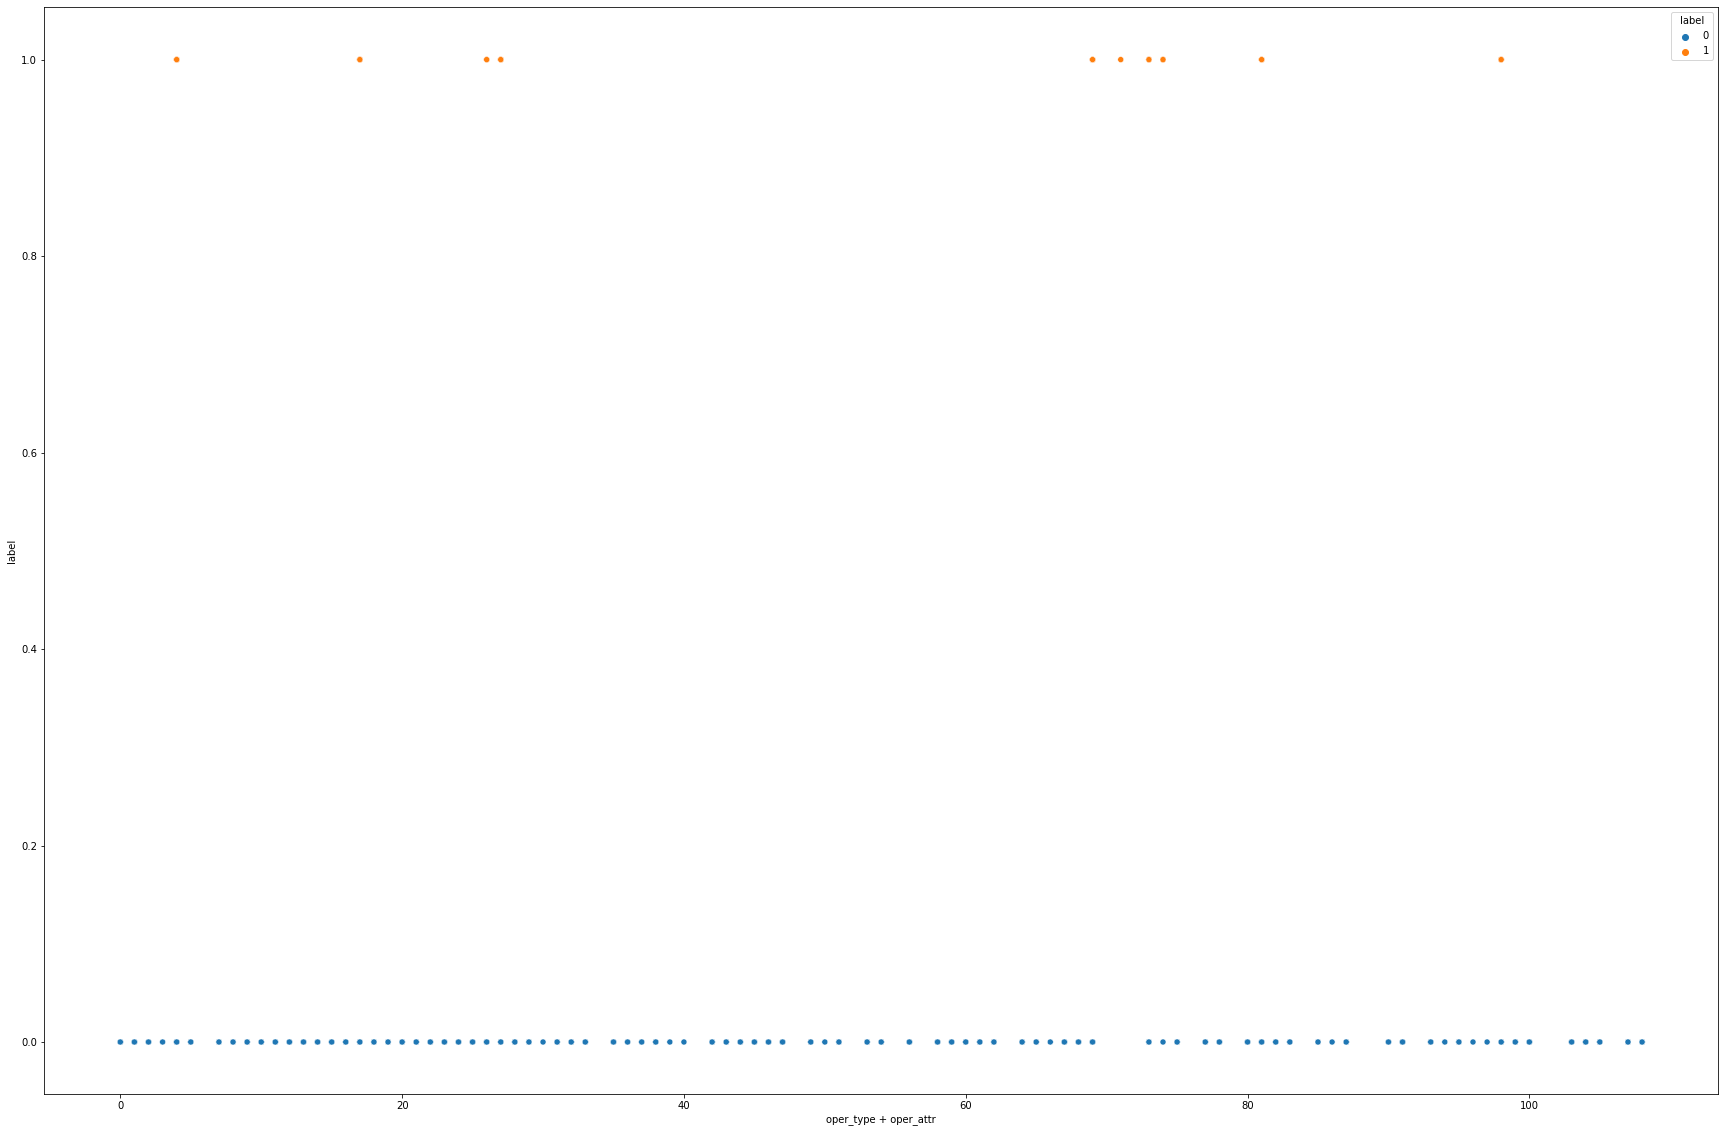

In [4]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df.sample(1000000), x="oper_type + oper_attr", y="label",hue='label')
plt.show()

In [5]:
df.groupby('oper_type + oper_attr')['label'].sum().sort_values(ascending = False).head(30)


oper_type + oper_attr
4     48669
69    21127
73     4632
27      228
17      164
98      139
81       25
26        7
74        3
76        1
72        1
71        1
68        0
70        0
83        0
67        0
66        0
65        0
64        0
75        0
62        0
77        0
78        0
79        0
80        0
61        0
60        0
82        0
0         0
84        0
Name: label, dtype: int64

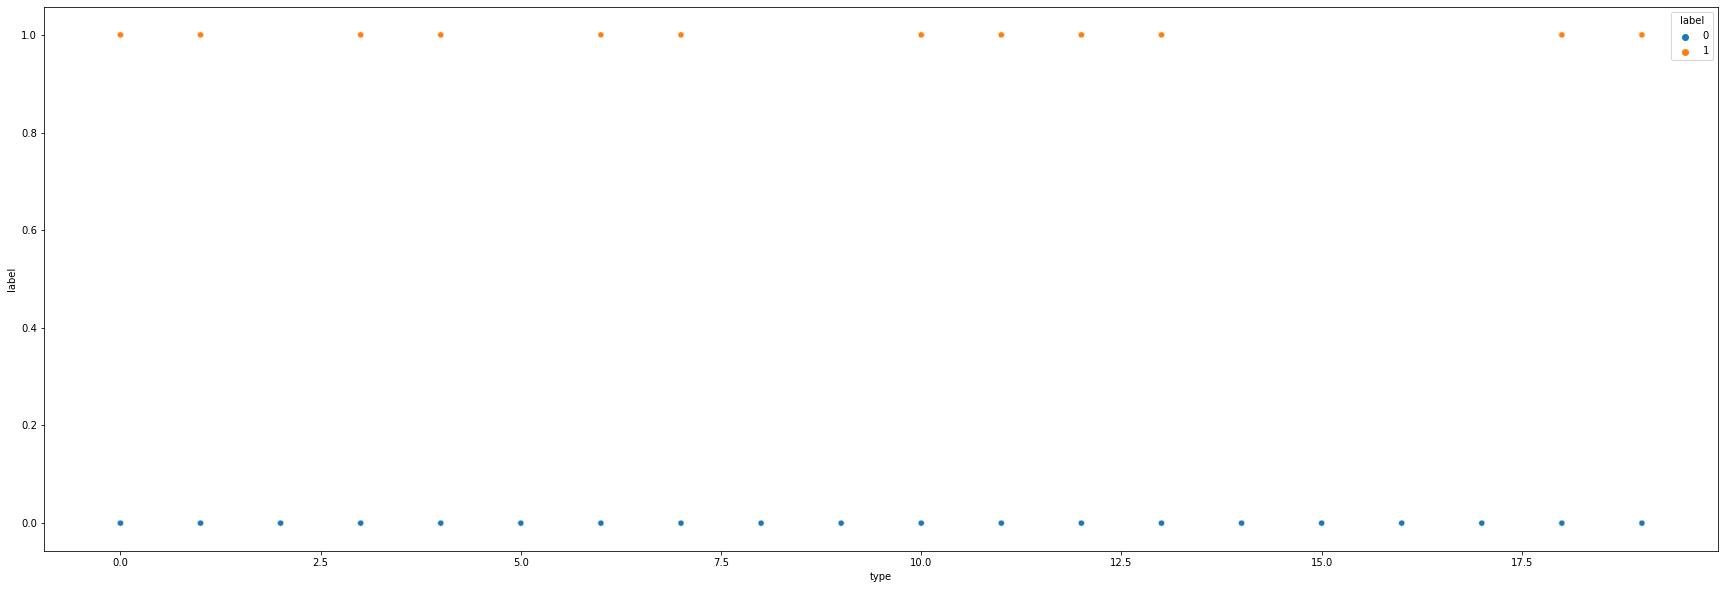

In [6]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df.sample(1000000), x="type", y="label",hue='label')
plt.show()

In [7]:
df.groupby('type')['label'].sum().sort_values(ascending = False).head(30)

type
4     47765
3     21575
13     4059
19      850
18      409
1       153
11       62
10       48
12       30
0        30
7        13
6         2
16        1
8         0
9         0
5         0
14        0
15        0
17        0
2         0
Name: label, dtype: int64

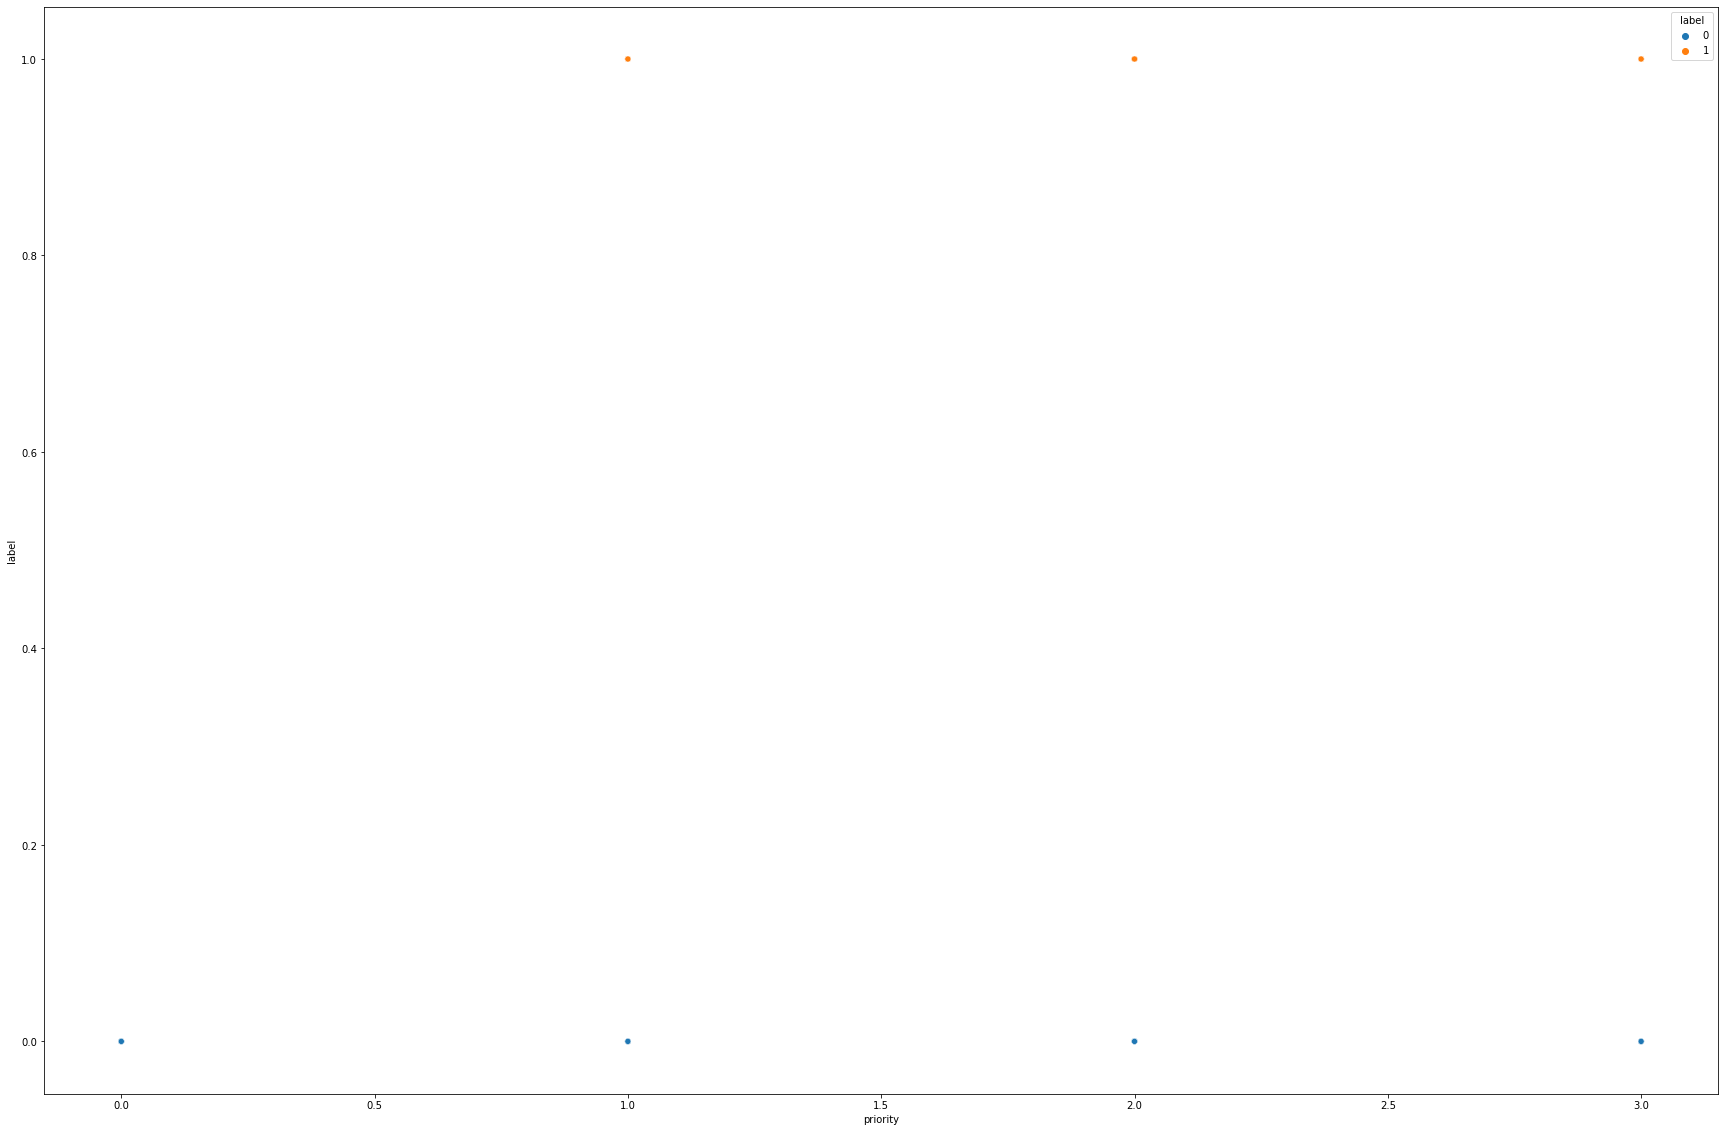

priority
1    1749992
3     764416
2     114803
0       1453
Name: label, dtype: int64

In [8]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df.sample(1000000), x="priority", y="label",hue='label')
plt.show()
df.groupby('priority')['label'].count().sort_values(ascending = False).head(30)

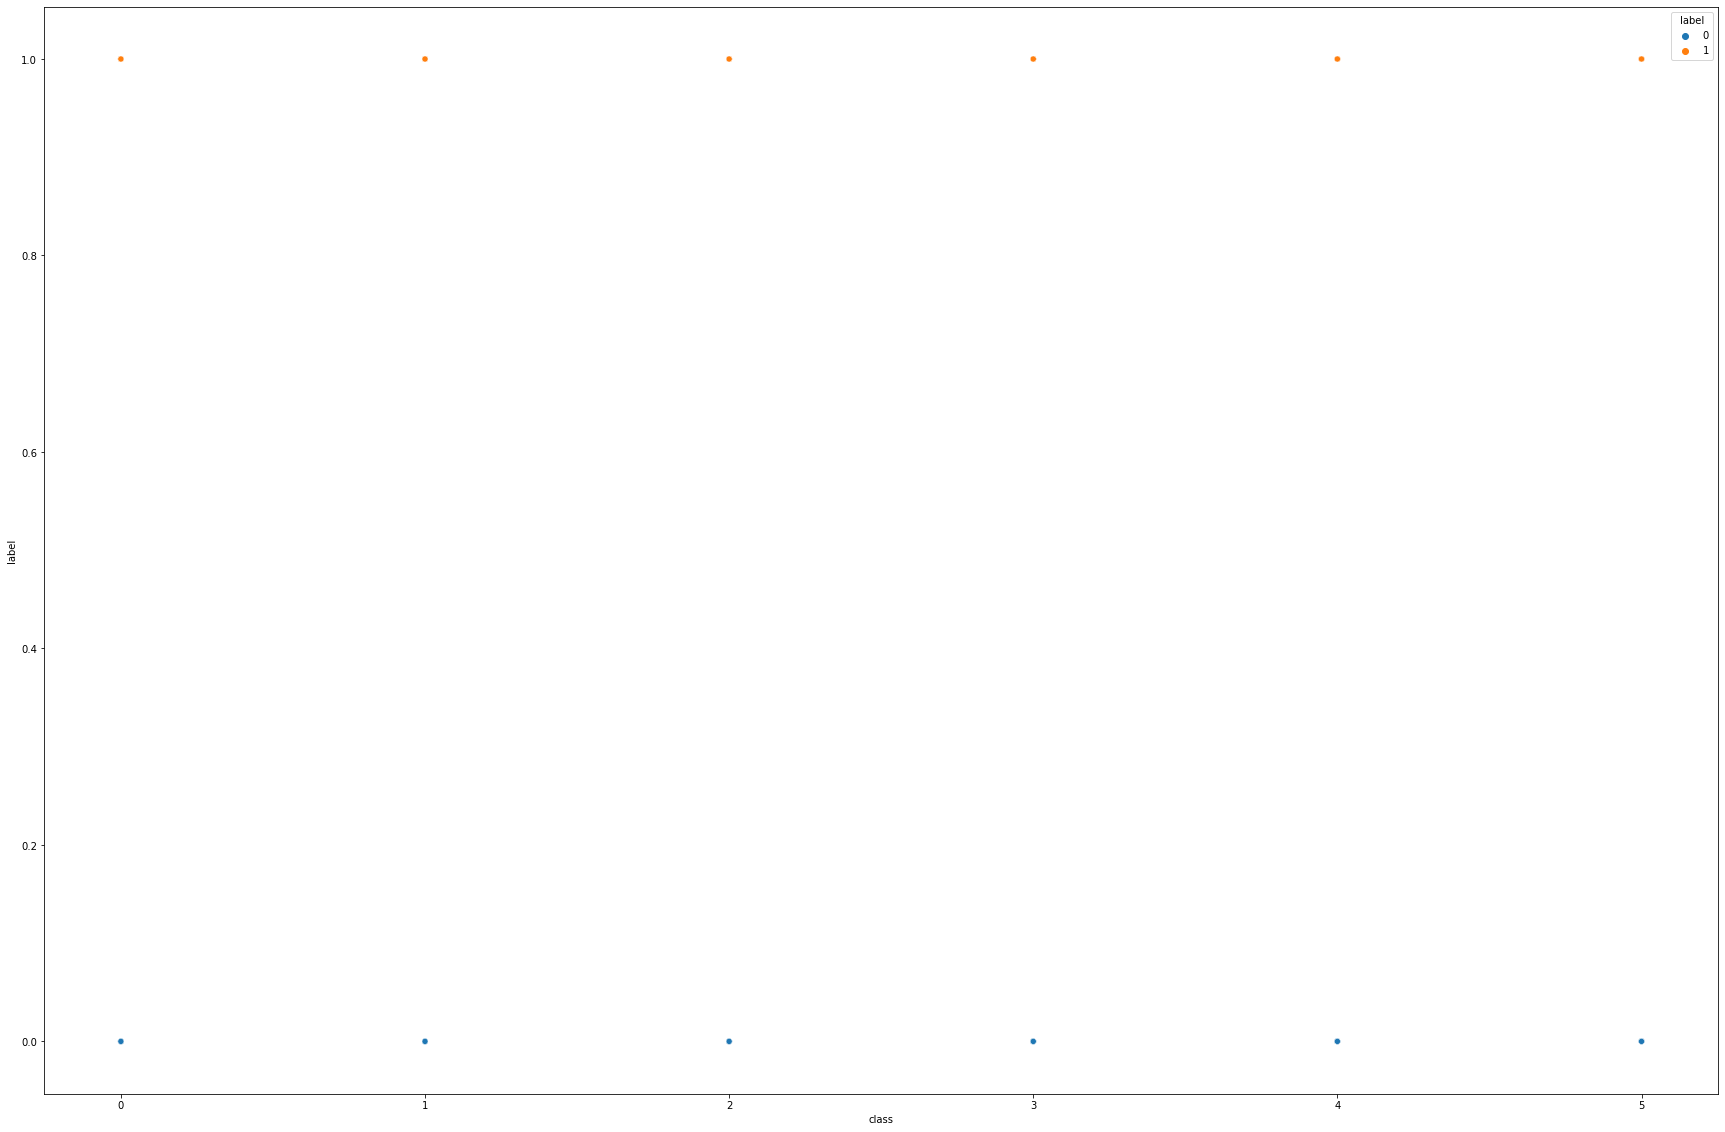

class
0.0    2286126
3.0     163293
2.0      65877
4.0      57578
1.0      50132
5.0       7658
Name: label, dtype: int64

In [9]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df.sample(1000000), x="class", y="label",hue='label')
plt.show()
df.groupby('class')['label'].count().sort_values(ascending = False).head(30)

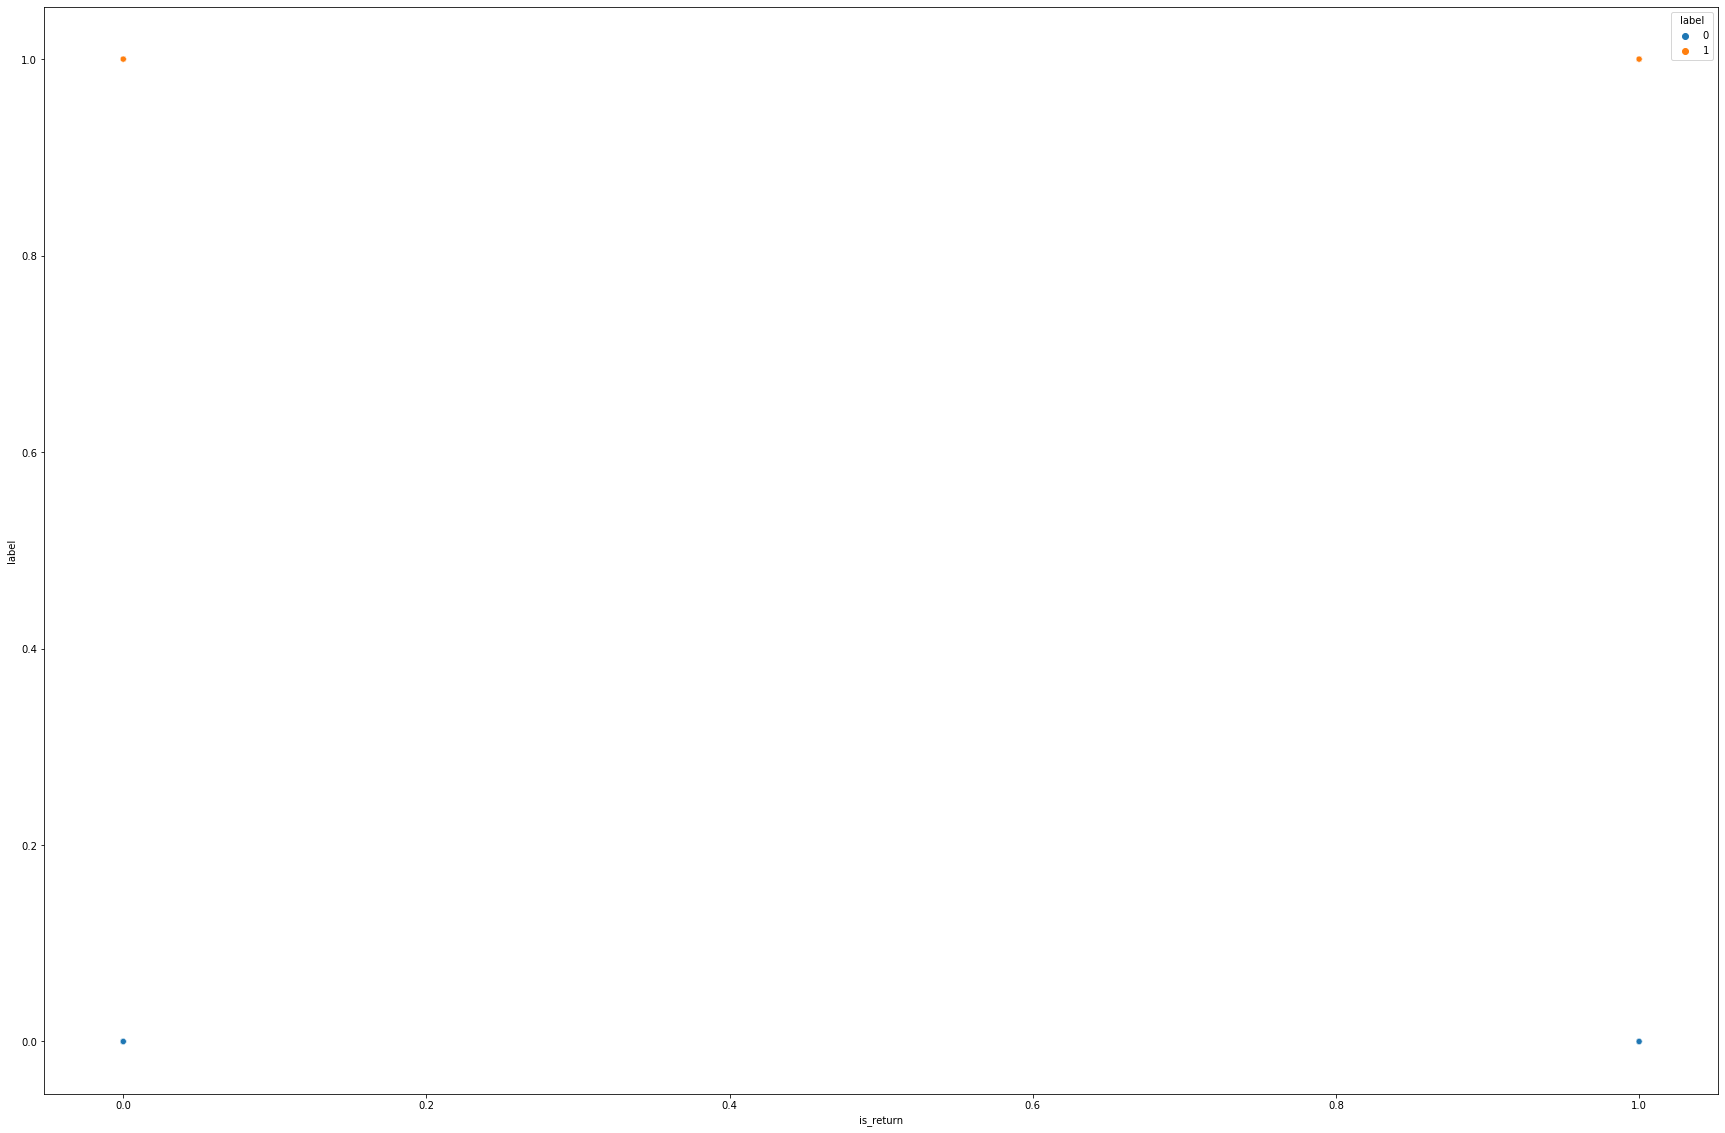

is_return
0    2627609
1       3055
Name: label, dtype: int64

In [10]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df.sample(1000000), x="is_return", y="label",hue='label')
plt.show()
df.groupby('is_return')['label'].count().sort_values(ascending = False).head(30)

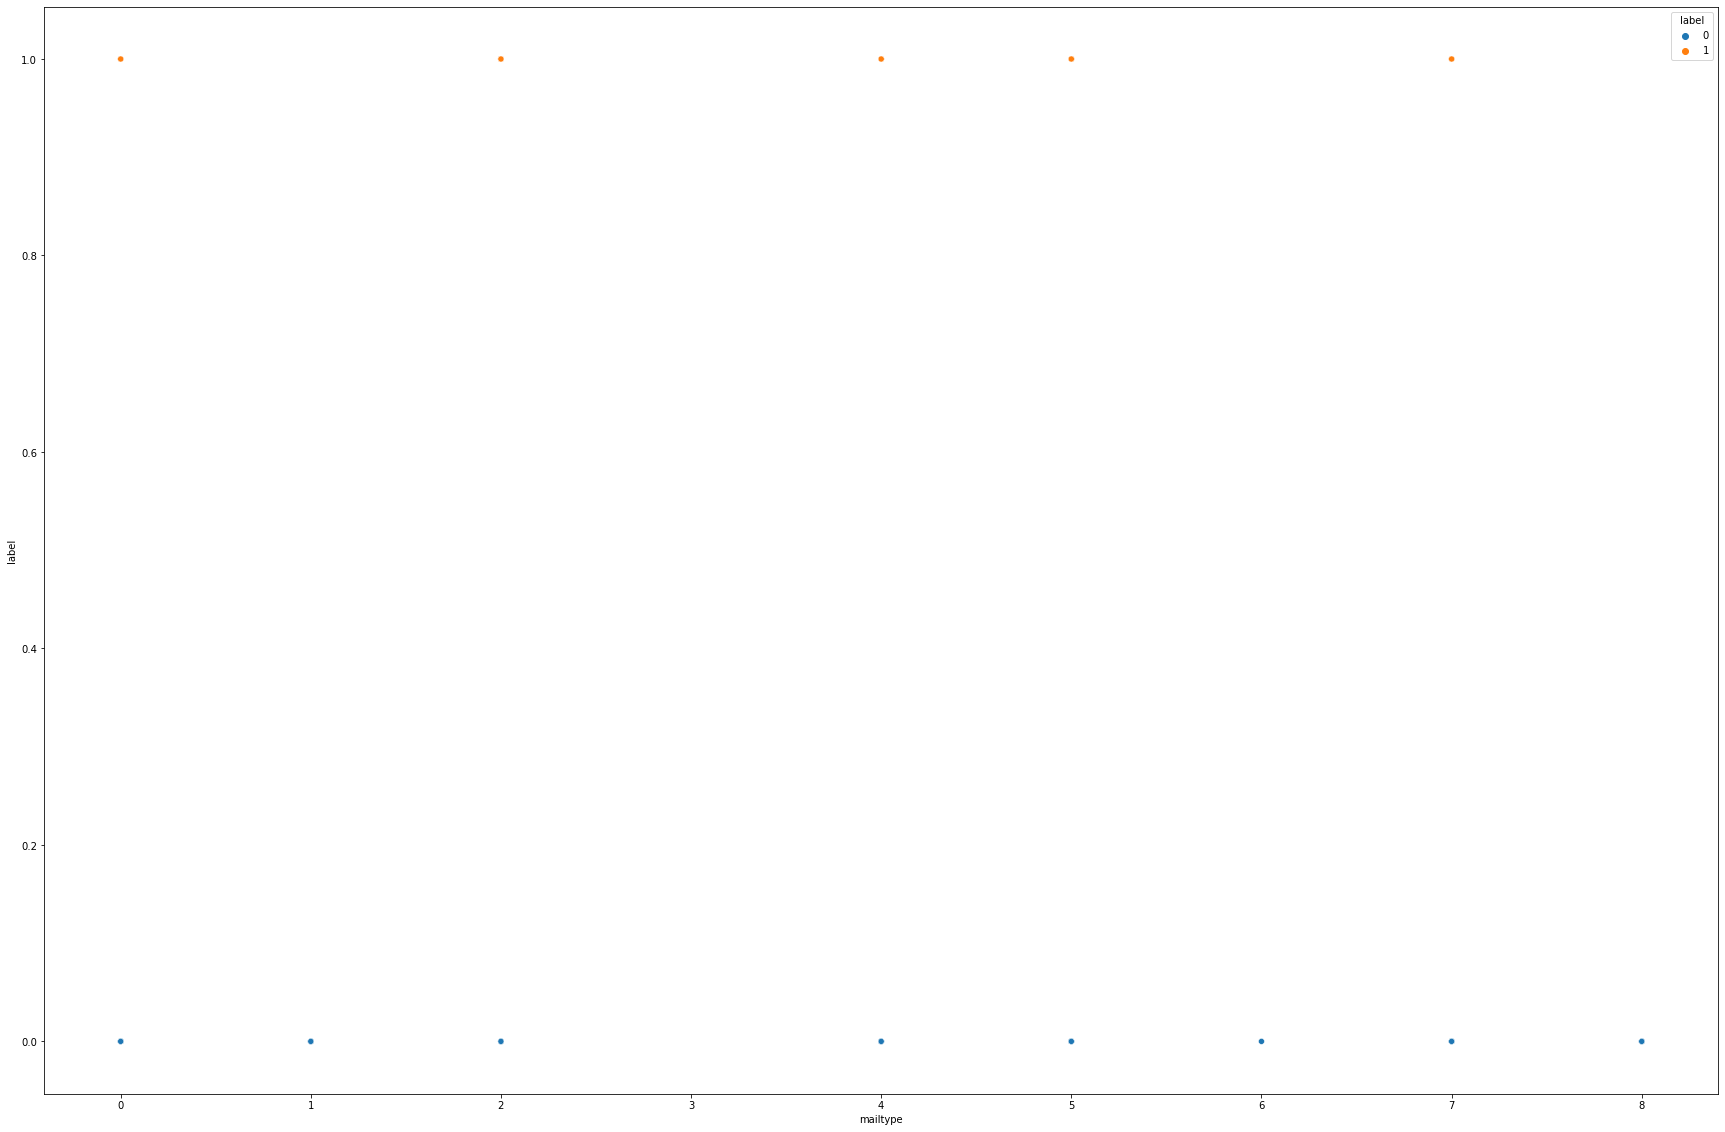

mailtype
5.0    2627484
0.0       2268
2.0        638
7.0        214
4.0         40
1.0         11
8.0          8
6.0          1
Name: label, dtype: int64

In [12]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="mailtype", y="label",hue='label')
plt.show()
df.groupby('mailtype')['label'].count().sort_values(ascending = False).head(30)

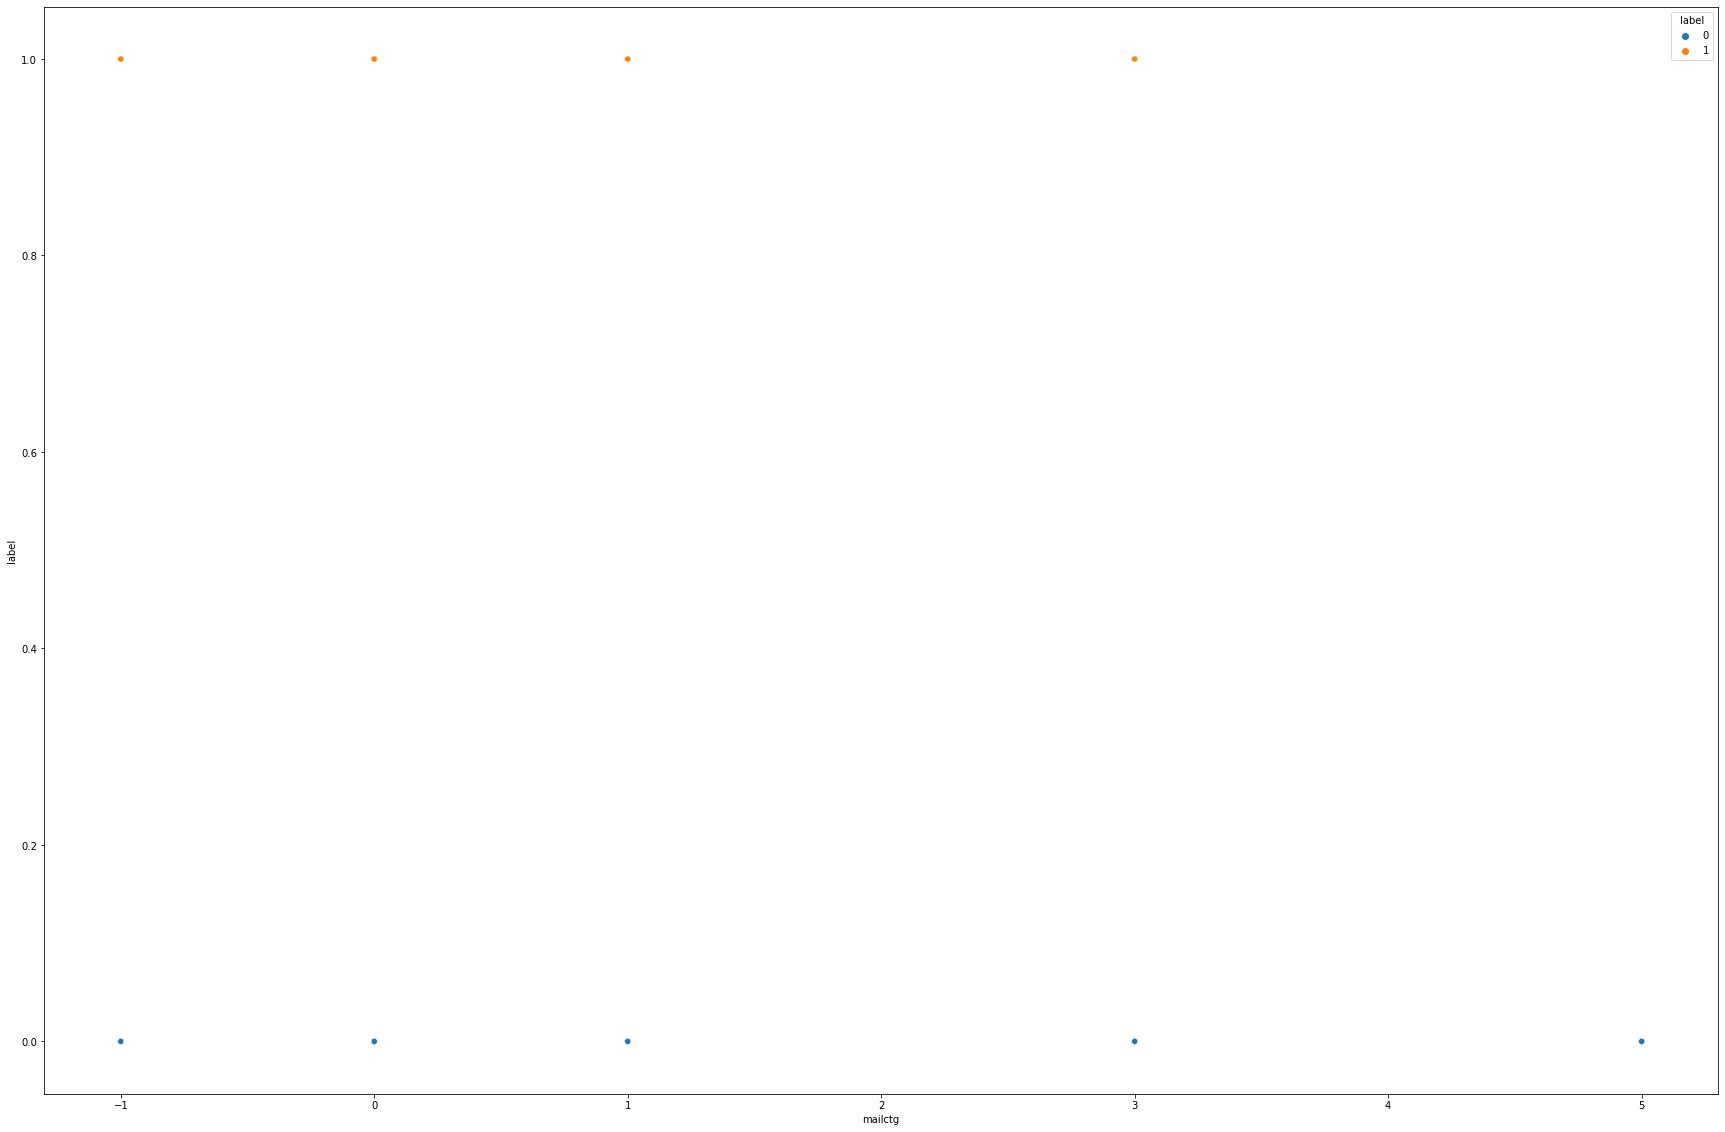

mailctg
 1.0    2055226
 0.0     551483
-1.0      23690
 3.0        254
 5.0         11
Name: label, dtype: int64

In [13]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="mailctg", y="label",hue='label')
plt.show()
df.groupby('mailctg')['label'].count().sort_values(ascending = False).head(30)

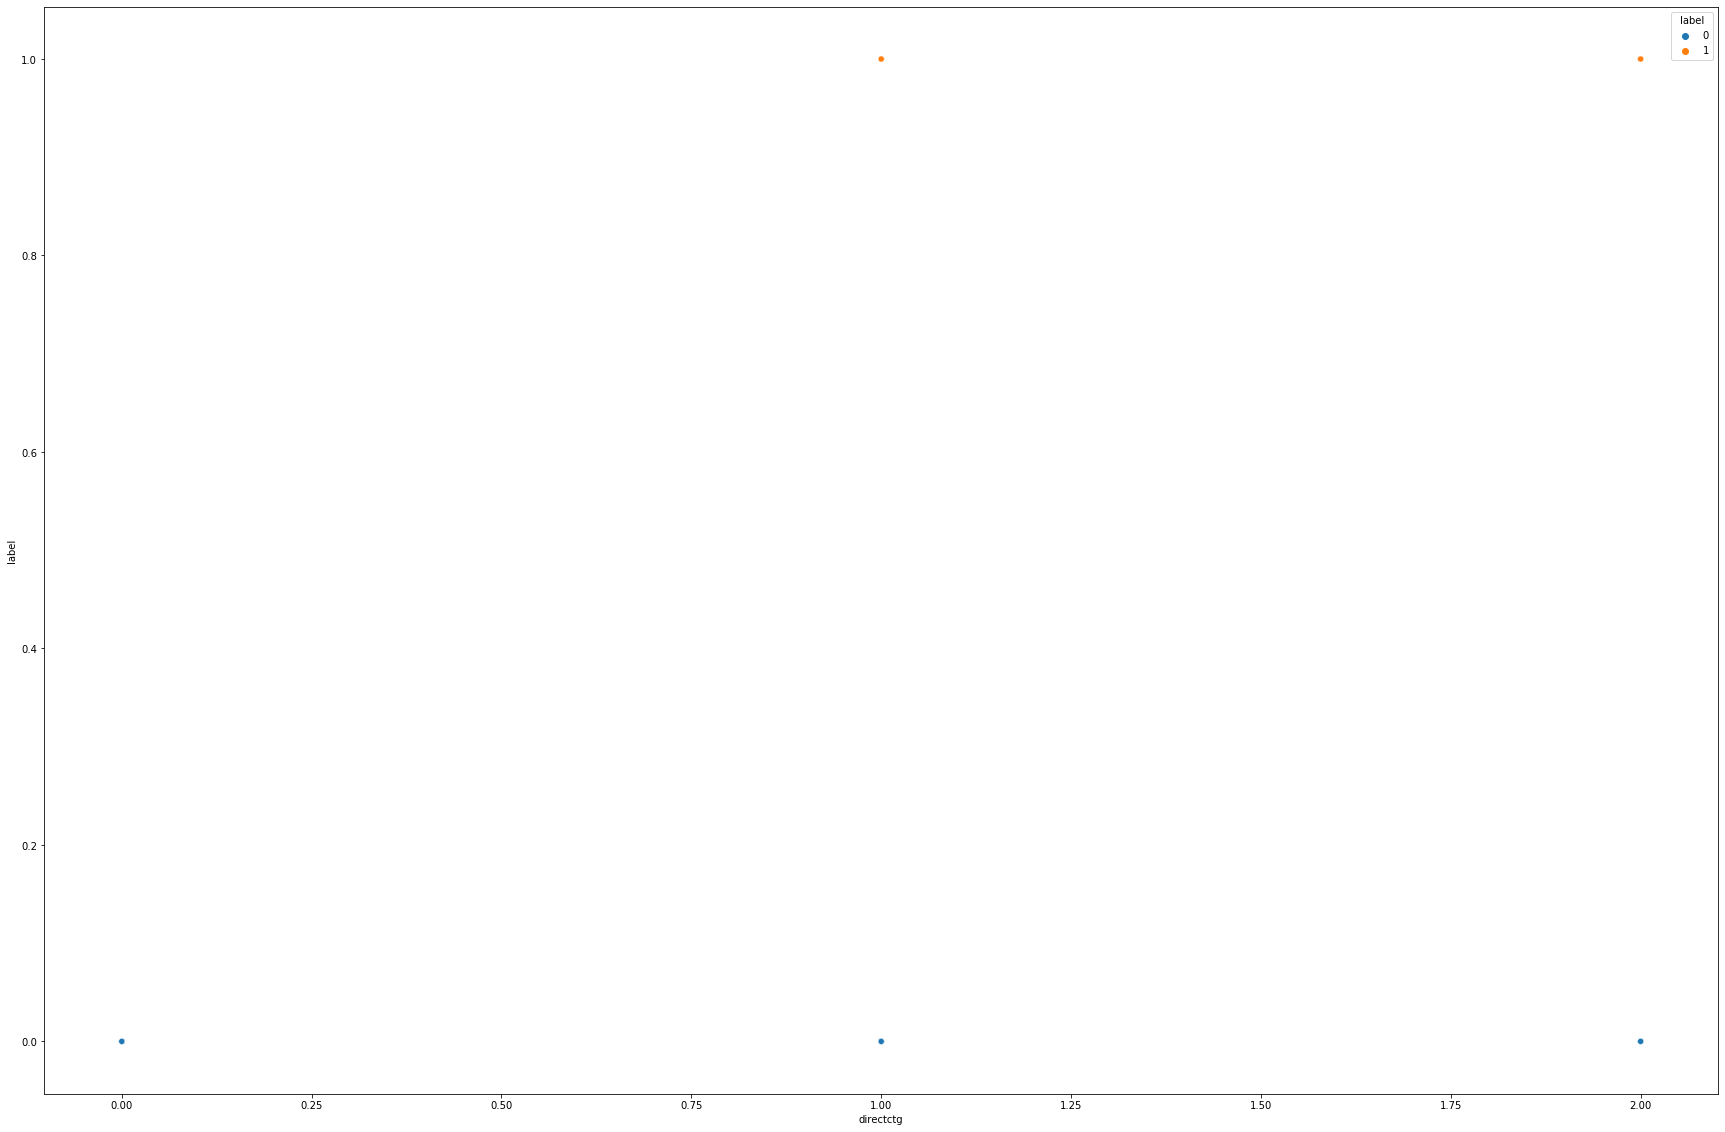

directctg
2.0    2600459
1.0      30142
0.0         63
Name: label, dtype: int64

In [15]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="directctg", y="label",hue='label')
plt.show()
df.groupby('directctg')['label'].count().sort_values(ascending = False).head(30)

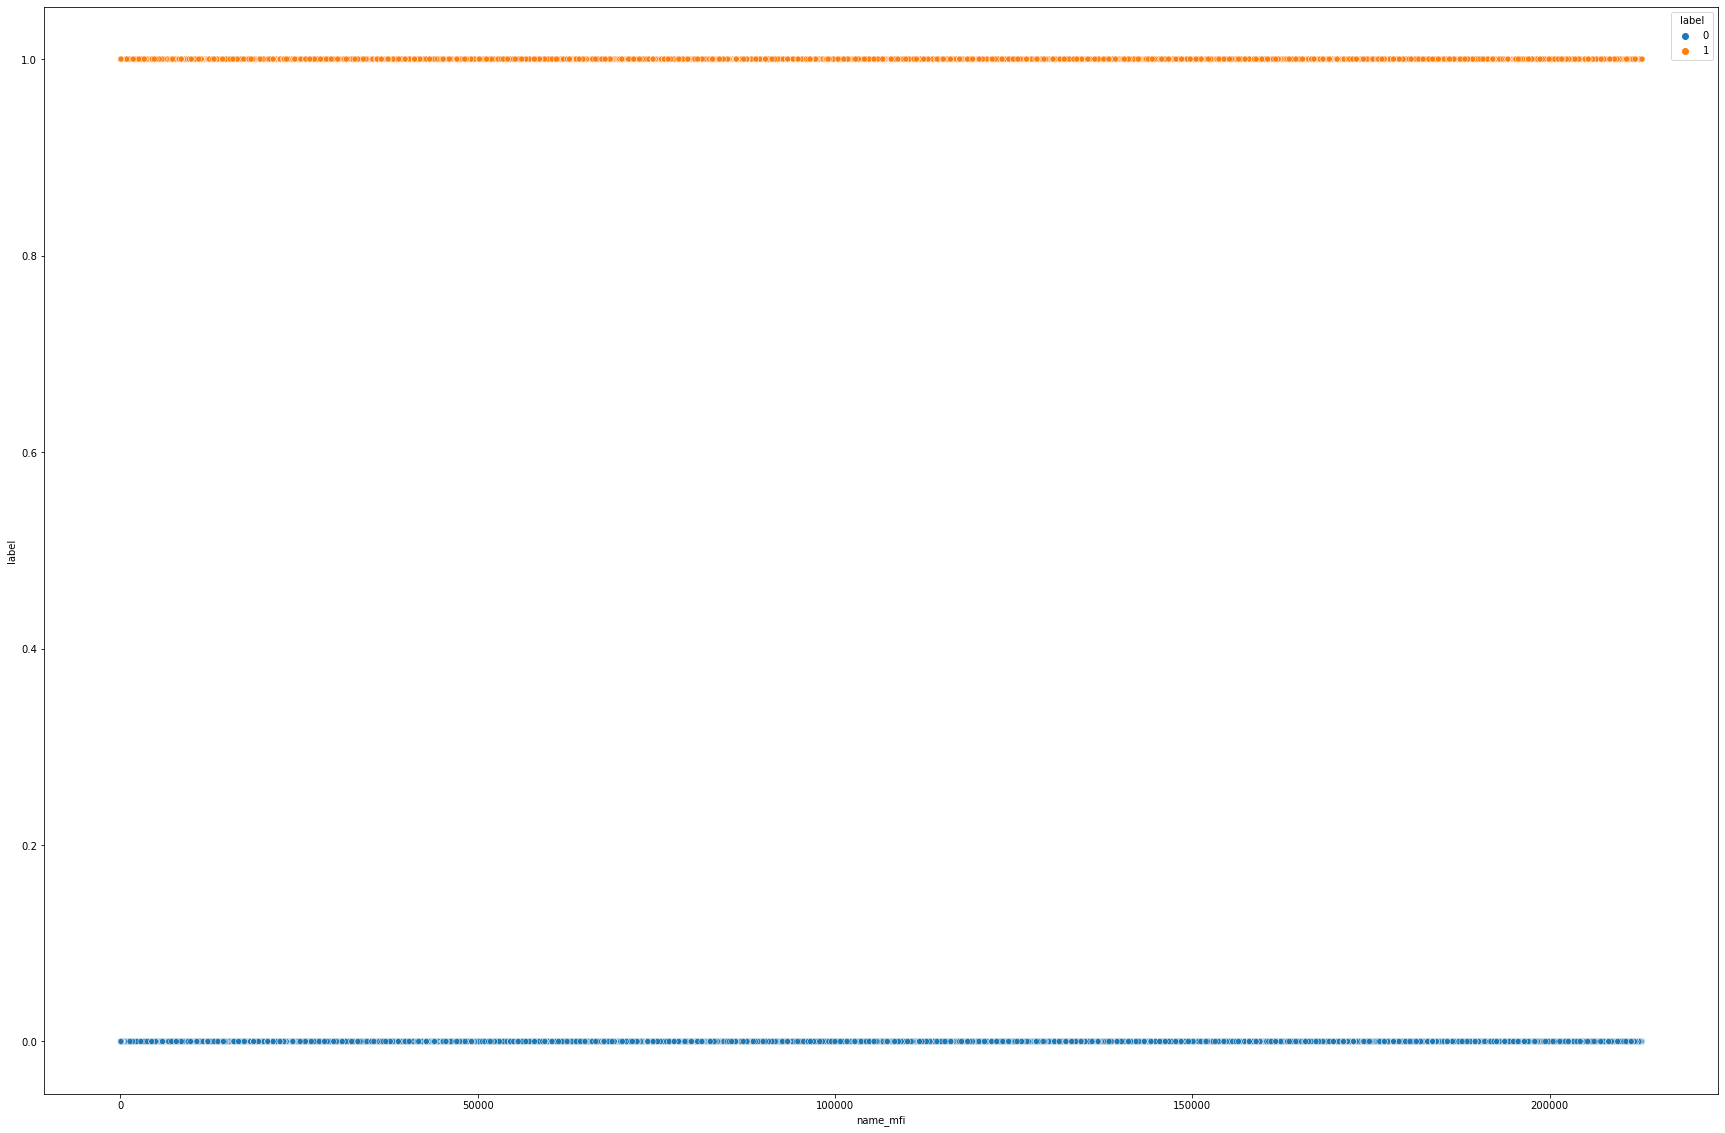

name_mfi
101       357219
74551      21067
108790     19735
183628     18749
93381      10876
76659       9962
146219      7503
123382      7081
119270      6857
194153      6492
85202       6491
178151      6196
39862       5938
121923      5908
93066       5723
21386       5512
37587       5502
196468      5499
22372       5275
61209       5232
8532        5039
105439      4017
90286       3923
166674      3677
96559       3654
156467      3633
115384      3631
192058      3554
47099       3482
157391      3474
Name: label, dtype: int64

In [16]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="name_mfi", y="label",hue='label')
plt.show()
df.groupby('name_mfi')['label'].count().sort_values(ascending = False).head(30)

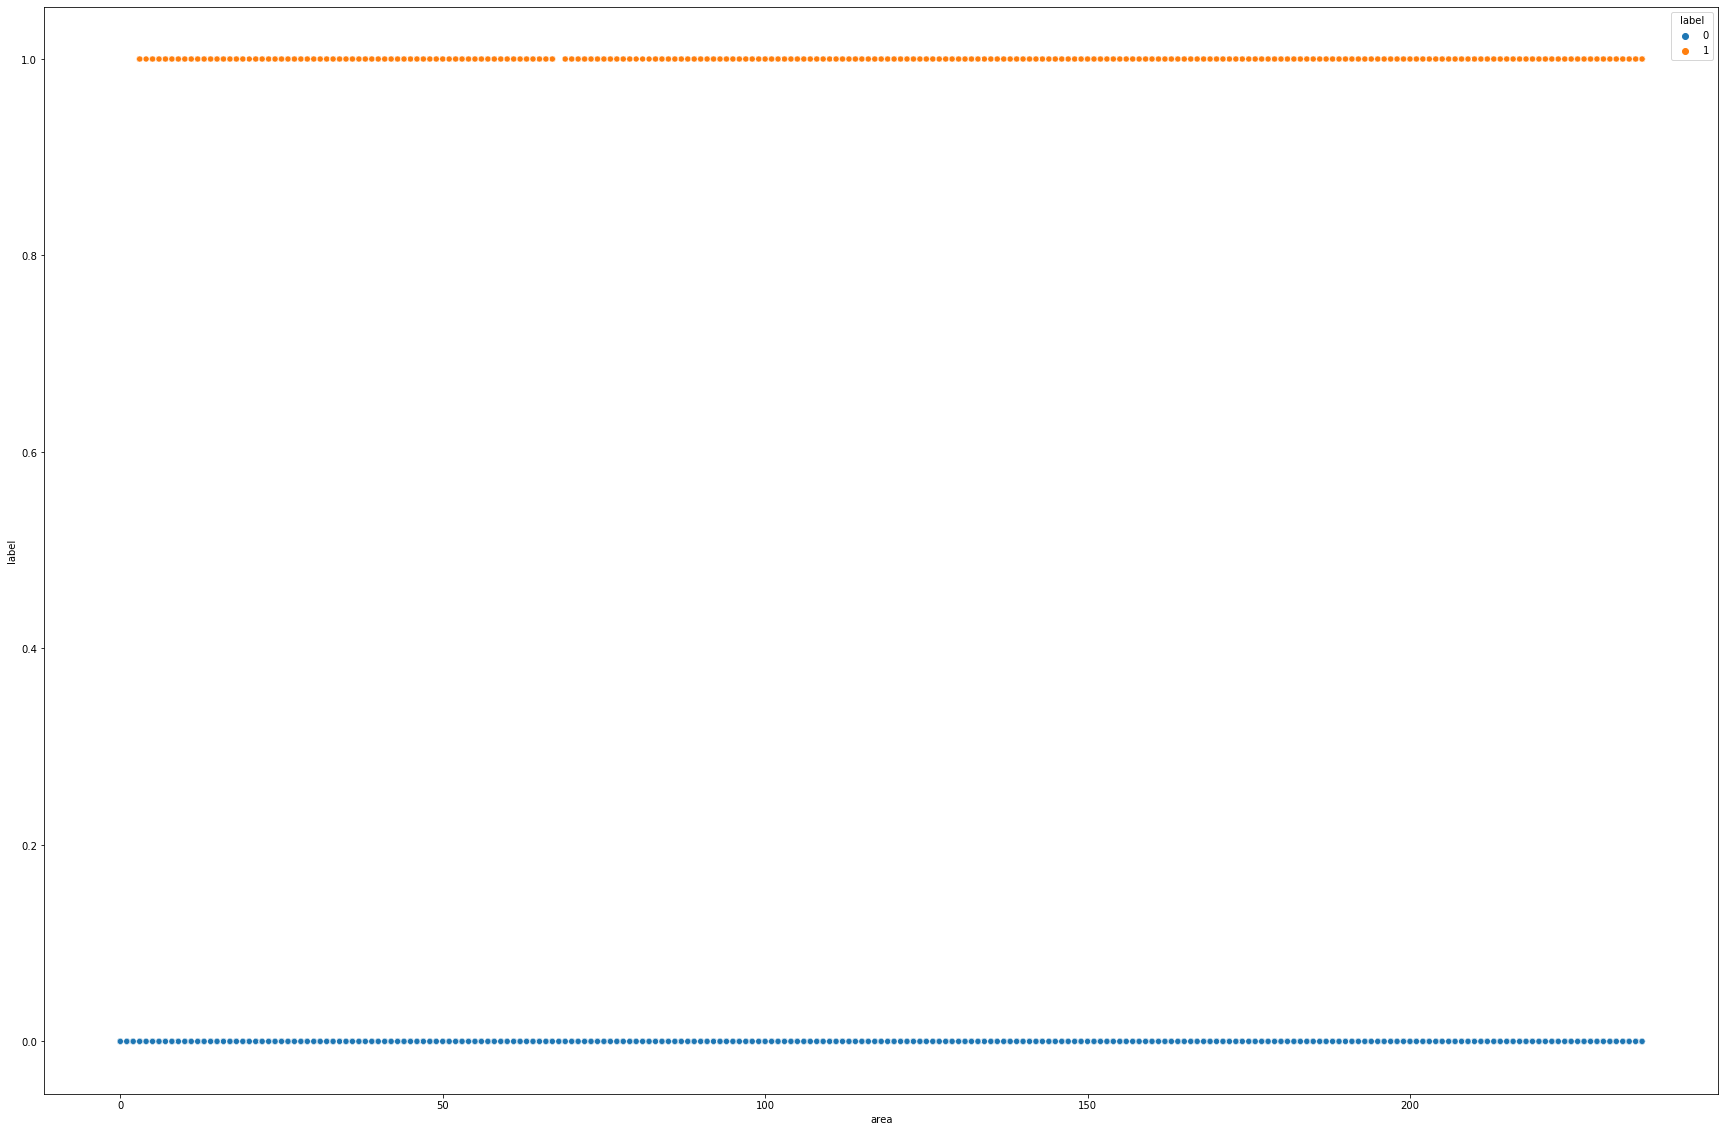

area
3      1317019
175      86129
133      85065
184      82289
22       66759
8        54295
23       40842
68       39400
5        26217
96       25375
10       24836
233      24622
155      22007
179      18547
102      17918
165      16732
27       16617
182      15066
93       14809
120      14583
204      14190
25       13738
24       13228
207      12933
168      10177
84        9972
98        9621
111       9552
36        9070
149       8306
74        8188
86        8103
97        7747
152       7620
116       7203
94        7202
234       7100
159       6952
72        6472
95        6347
187       6235
206       6165
183       6156
49        6147
57        5971
208       5805
52        5797
128       5690
29        5670
58        5660
125       5478
191       5477
139       5430
199       5302
43        5266
201       5059
42        4788
235       4610
56        4603
178       4563
177       4558
162       4448
12        4393
85        4340
91        4322
92        4218
157  

In [20]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="area", y="label",hue='label')
plt.show()
df.groupby('area')['label'].count().sort_values(ascending = False).head(1000)

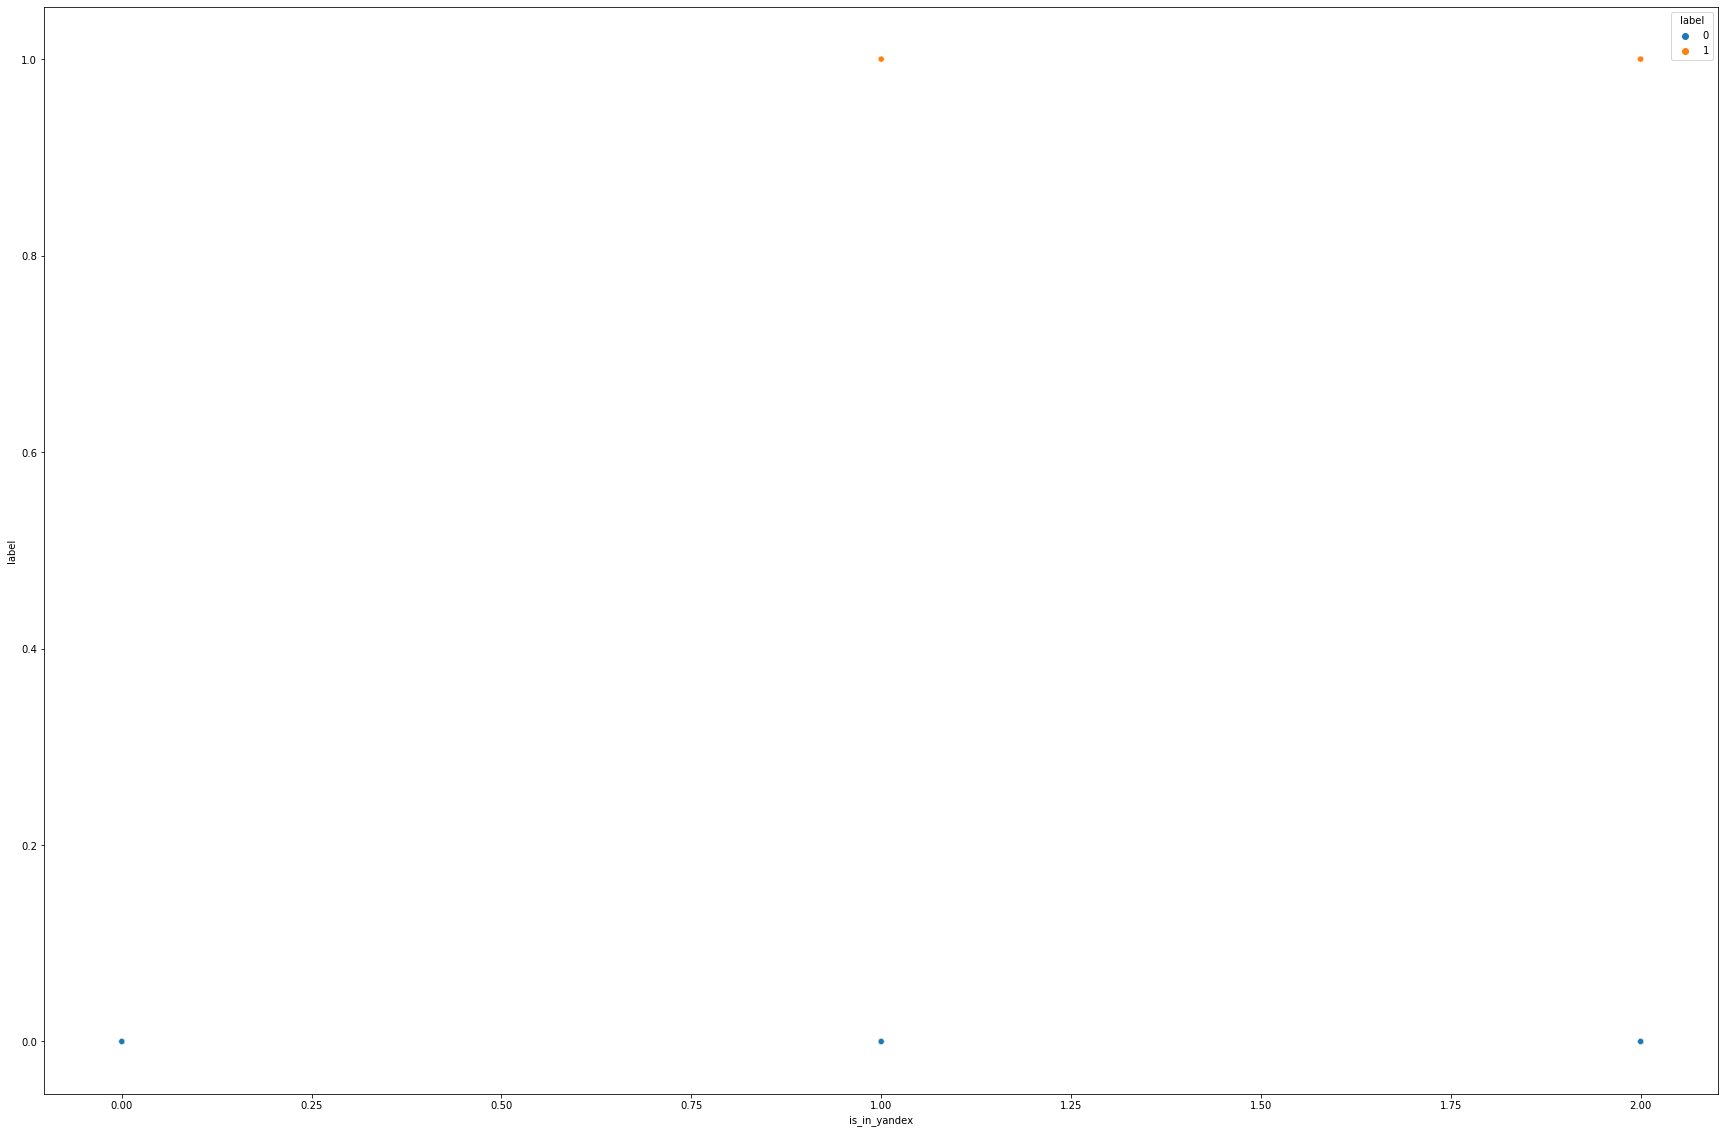

is_in_yandex
1    1572177
2    1057317
0       1170
Name: label, dtype: int64

In [21]:
plt.figure(figsize=(30,20))
sns.scatterplot(data=df, x="is_in_yandex", y="label",hue='label')
plt.show()
df.groupby('is_in_yandex')['label'].count().sort_values(ascending = False).head(1000)

In [5]:
data_failed = pd.read_csv("data_failed.csv",low_memory=False)
data_failed

,area,sum_label
0,,0
1,0,0
2,101,0
3,102,109350
4,103,2
...,...,...
232,689,81
233,690,1302
234,692,802
235,693,183


In [6]:
data_total_area = pd.read_csv("data_total_area.csv",low_memory=False)
data_total_area

,area,total_qty_over_index_area
0,,2.813574e+08
1,0,4.076084e+10
2,101,9.559870e+08
3,102,3.484228e+14
4,103,4.093270e+05
...,...,...
232,689,8.219519e+08
233,690,4.392930e+11
234,692,2.356651e+10
235,693,5.504530e+10


In [7]:
df['label'].value_counts()

0    5829020
1     170980
Name: label, dtype: int64

Обьединим список не нужных строк с списком строк типа object

In [8]:
col_obj = df.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id", "label"]))

In [9]:
col_obj

['id', 'label']

In [10]:

X = df.drop(col_obj, axis = 1)
y = df["label"]
X_nosc=X
y_nosc=y

In [11]:
scaler=MinMaxScaler()
k=4
trans=SelectKBest(chi2, k=k)
X_nosc=scaler.fit_transform(X_nosc)
X = scaler.fit_transform(X)
X =trans.fit_transform(X, y)
X_nosc =trans.transform(X_nosc)
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

X.shape

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_nosc, y_nosc, test_size=0.15)

In [49]:
pipe = ComplementNB()
pipe.fit(X, y)
predictions = pipe.predict(X_test)
print(classification_report(y_test,predictions))  

              precision    recall  f1-score   support

           0       1.00      0.66      0.79    874204
           1       0.08      0.95      0.14     25796

    accuracy                           0.66    900000
   macro avg       0.54      0.80      0.47    900000
weighted avg       0.97      0.66      0.77    900000



In [50]:
metr=(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])*0.9) +(recall_score(y_test, predictions, average='weighted')*0.1)
metr

0.8504145849936715

In [38]:
scor=cross_val_score(pipe, X_train, y_train,scoring='roc_auc', cv=40)
scor2=cross_val_score(pipe, X_train, y_train,scoring='recall_weighted', cv=40)
print(f"""Gaussian NB средняя требуемая величина {((round(np.mean(scor), 3))*0.9)+((round(np.mean(scor2), 3))*0.1)} 
            стандартное отклонение roc_auc {round(np.std(scor), 3)}
            стандартное отклонение recal {round(np.std(scor2), 3)}""")

Gaussian NB средняя требуемая величина 0.8778000000000001 
            стандартное отклонение roc_auc 0.002
            стандартное отклонение recal 0.001


pool_train = cb.Pool(X, y)
params = {                  # 'task_type':'GPU',
                            'iterations':1200,
                            'depth':8,
                            'random_state':2,
                            'learning_rate':0.01,
                            'eval_metric':'HammingLoss',
                            'loss_function':'MultiCrossEntropy'}
clf_with_aux = cb.CatBoostClassifier(**params)
clf_with_aux.fit(pool_train)
predcat = clf_with_aux.predict(X_test)
print(classification_report(y_test, predcat))

# Подбор параметров нейронки!


from keras import models
from keras import layers
for i in range(10,34):
    X = df.drop(col_obj, axis = 1)
    y = df["label"]
    X_nosc=X
    y_nosc=y
    scaler=MinMaxScaler()
    k=i
    trans=SelectKBest(chi2, k=k)
    X_nosc=scaler.fit_transform(X_nosc)
    X = scaler.fit_transform(X)
    X =trans.fit_transform(X, y)
    X_nosc =trans.transform(X_nosc)
    sm = SMOTE(random_state=42)
    X, y = sm.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_nosc, y_nosc, test_size=0.15)
    print('___________________________________________________________________________')
    print('___________________________________________________________________________')
    print('Признаков',i)
    def build_model():
        model = models.Sequential()
        model.add(layers.Dense(160,activation='sigmoid',input_shape=(k,)))
        model.add(layers.Dense(4,activation='sigmoid'))
        model.add(layers.Dense(1,activation='sigmoid'))
        model.compile(optimizer='rmsprop',# Вы также можете указать параметры для оптимизатора через optimizer = optimizer.RMSprop (lr = 0.001)
                  loss='binary_crossentropy', # Эквивалент потерь = loss.binary_crossentropy
                  metrics=[tf.keras.metrics.AUC()]) # Эквивалентно метрике = [metircs.binary_accuracy]
        return model


    model=build_model()



    history = model.fit(X, y,
                    epochs=2, # Итерировать 20 раз по полному набору данных
                    batch_size=512,
                    validation_data=(X_test, y_test))

    predictions = model.predict(X_test)
    pred=[]
    for i in predictions:
        pred.append(round(float(i)))
    print(classification_report(y_test, pred))
    print('roc_auk',roc_auc_score(y_test, model.predict(X_test)))
    model.save(str(k)+'my_model.h5')
    print('_________________________________')

model = load_model('21my_model.h5')


from keras.utils import np_utils
predictions = model.predict(X_test)
 

threshold=0.90
pre=np.where(predictions > threshold, 1,0)

print(classification_report(y_test, pre))    

## Обучение модели


#logistic = OneVsRestClassifier(RandomForestClassifier(max_depth=22,n_jobs=-1))
pipe=GaussianNB()
#pipe = Pipeline([('normalizer', scaler), ('classifier', logistic)])
pipe.fit(X, y)

predictions = pipe.predict(X_nosc)
print(classification_report(y_nosc, predictions))

roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_nosc, y_nosc, cv=40,scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf1=HistGradientBoostingClassifier(learning_rate=0.1, max_depth= 8, min_samples_leaf=100)
clf2=RandomForestClassifier(max_depth=15,n_jobs=9)
eclf1 = VotingClassifier([('gb', clf2),('rf', clf2)], voting='soft',weights=[1,1.5])
pipe = Pipeline([('normalizer', scaler), ('classifier', eclf1)])
pipe.fit(X_train, y_train)

pool_train = cb.Pool(X_train,y_train)
params = {                  # 'task_type':'GPU',
                            'iterations':1200,
                            'depth':8,
                            'random_state':2,
                            'learning_rate':0.01,
                            'eval_metric':'Recall',
                            'loss_function':'MultiCrossEntropy'}
clf_with_aux = cb.CatBoostClassifier(**params)
clf_with_aux.fit(pool_train)


predcat = clf_with_aux.predict(X_test)






print(classification_report(y_test, predcat))



parametrs = {
              'max_depth': range (1,35),
            }
grid = GridSearchCV(RandomForestClassifier(), parametrs, scoring='roc_auc', cv=2,n_jobs=9) 
grid.fit(X_test, y_test) 
grid.best_params_



pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe, file)

with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=2,   # use any cross validation technique 
                 verbose=1, 
                 scoring='roc_auc') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_


gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = HistGradientBoostingClassifier()

clf = GridSearchCV(gb_gs,
                               gb_grid_params,
                               cv=2,
                               scoring='roc_auc',
                               verbose = 3, 
                               n_jobs=2);
clf.fit(X_train, y_train);
clf.best_params_

# Нейронка

from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf 
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(160,activation='sigmoid',input_shape=(k,)))
    model.add(layers.Dense(4,activation='sigmoid'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',# Вы также можете указать параметры для оптимизатора через optimizer = optimizer.RMSprop (lr = 0.001)
                  loss='binary_crossentropy', # Эквивалент потерь = loss.binary_crossentropy
                  metrics=[tf.keras.metrics.AUC()]) # Эквивалентно метрике = [metircs.binary_accuracy]
    return model


model=build_model()



history = model.fit(X, y,
                    epochs=2, # Итерировать 20 раз по полному набору данных
                    batch_size=512,
                    validation_data=(X_test, y_test))


predictions = model.predict(X_test)
pred=[]
for i in predictions:
    pred.append(round(float(i)))
print('нейронка',classification_report(y_test, pred))

from keras_tuner import RandomSearch
from keras_tuner import Objective
from keras import models
from keras import layers
import tensorflow as tf 
def build_model(hyperparams):
    model = models.Sequential()
    model.add(layers.Input(shape=(X.shape[1],)))
    model.add(layers.Dense(units=hyperparams.Int("units_l1", 16, 50, step=16),
                           use_bias=hyperparams.Boolean("bias_l1"),
                           activation=hyperparams.Choice("act_l1", ["relu", "tanh",'sigmoid'])
                          ))
    model.add(layers.Dense(units=hyperparams.Int("units_l2", 16, 50, step=16),
                           use_bias=hyperparams.Boolean("bias_l2"),
                           activation=hyperparams.Choice("act_l2", ['sigmoid'])
                          ))
    model.add(layers.Dense(1))

    optim=hyperparams.Choice("optimizer",["sgd","rmsprop","adam"])
    model.compile(optim, loss="binary_crossentropy", metrics=["accuracy",tf.keras.metrics.AUC()])

    return model
tuner1 =  RandomSearch(hypermodel=build_model,
                      objective="val_loss",
                      #objective=Objective(name="val_mean_squared_error",direction="min"),
                      max_trials=2,
                      #seed=123,
                      project_name="Regression",
                      overwrite=True
                    )

tuner1.search(X, y, batch_size=512, epochs=2, validation_data=(X_test, y_test))

best_params = tuner1.get_best_hyperparameters()

best_params[0].values

best_model = tuner1.get_best_models()[0]

best_model.summary()


predictions = best_model.predict(X_test)
pred=[]
for i in predictions:
    pred.append(round(float(i)))
print('нейронка',classification_report(y_test, pred))

# Нейронка 2

def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=29, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
	return model

estimator = KerasClassifier(model=create_baseline, epochs=1, batch_size=512, verbose=0)
kfold = StratifiedKFold(n_splits=41, shuffle=True, random_state=42)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

model2=create_baseline()
model2.fit(X, y)
model2.predict(X_test)


predictions = model2.predict(X_test)
pred=[]
for i in predictions:
    pred.append(round(float(i)))
print('нейронка',classification_report(y_test, pred))

# Предсказание 

In [51]:
pred_data=pd.read_csv('test_dataset_test.csv',low_memory=False)


In [52]:
df=pred_data

In [53]:
df['area']=df['index_oper'].str[0:3]
df = pd.merge(df,data_total_area, on="area", how='left')
df = pd.merge(df,data_failed, on="area", how='left')
df['percent_loss']=df['sum_label']/df['total_qty_over_index_area'] 
df['area'] = pd.Categorical(df['area'])
df['area'].astype('category').cat.codes
df['area'] = df['area'].cat.codes
df["priority"] = pd.Categorical(df["priority"])
df["priority"].astype('category').cat.codes
df["priority"] = df["priority"].cat.codes
df["is_in_yandex"] = pd.Categorical(df["is_in_yandex"])
df["is_in_yandex"].astype('category').cat.codes
df["is_in_yandex"] = df["is_in_yandex"].cat.codes
df["is_return"] = pd.Categorical(df["is_return"])
df["is_return"].astype('category').cat.codes
df["is_return"] = df["is_return"].cat.codes
df["oper_type + oper_attr"] = pd.Categorical(df["oper_type + oper_attr"])
df["oper_type + oper_attr"].astype('category').cat.codes
df["oper_type + oper_attr"] = df["oper_type + oper_attr"].cat.codes
df["index_oper"] = pd.Categorical(df["index_oper"])
df["index_oper"].astype('category').cat.codes
df["index_oper"] = df["index_oper"].cat.codes
df["type"] = pd.Categorical(df["type"])
df["type"].astype('category').cat.codes
df["type"] = df["type"].cat.codes
df["is_privatecategory"] = pd.Categorical(df["is_privatecategory"])
df["is_privatecategory"].astype('category').cat.codes
df["is_privatecategory"] = df["is_privatecategory"].cat.codes
df["name_mfi"] = pd.Categorical(df["name_mfi"])
df["name_mfi"].astype('category').cat.codes
df["name_mfi"] = df["name_mfi"].cat.codes
df["weightkg"] = round(df["weight"]/1000)
df['is_wrong']=df['is_wrong_sndr_name']+df['is_wrong_rcpn_name']+df['is_wrong_phone_number']+df['is_wrong_address']
df['total_mean']=df['total_qty_over_index_and_type']/df['total_qty_over_index']

In [54]:
df = df.fillna(0)


In [55]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,area,total_qty_over_index_area,sum_label,percent_loss,weightkg,is_wrong,total_mean
0,7815282,90,23,4,1,1,0.0,1,0,85.0,5.0,1.0,0.0,2.0,0.00,0.0,105982,73.0,489.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,0,0,3,3.484228e+14,109350,3.138428e-10,0.0,0,0.969453
1,8443555,94,4430,3,1,1,4.0,2,0,21.0,5.0,0.0,0.0,2.0,0.00,0.0,116968,19.0,186.0,2.0,2895.0,1545.0,4440.0,20623.0,0,1,1,0,73,4.381023e+09,382,8.719424e-08,0.0,2,0.215294
2,6352559,17,15333,3,1,1,4.0,2,0,388.0,5.0,1.0,0.0,2.0,34.01,0.0,60268,348.0,500.0,3.0,2751.0,993.0,3744.0,37817.0,0,0,0,0,173,1.048056e+10,235,2.242246e-08,0.0,0,0.099003
3,4921420,11,16,15,1,1,0.0,1,0,1203.0,5.0,1.0,0.0,2.0,83.72,0.0,94,0.0,0.0,69.0,9379609.0,2267333.0,11646942.0,11759329.0,0,1,0,0,3,3.484228e+14,109350,3.138428e-10,1.0,1,0.990443
4,1420440,15,18,19,3,1,0.0,1,0,956.0,5.0,1.0,0.0,2.0,14.95,0.0,127073,946.0,1267.0,181.0,76138189.0,8747.0,76146936.0,84110459.0,0,1,0,0,3,3.484228e+14,109350,3.138428e-10,1.0,1,0.905321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,9030800,14,17999,3,1,1,4.0,2,0,53.0,5.0,1.0,0.0,2.0,0.00,0.0,192273,61.0,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,0,0,0,200,7.201455e+10,231,3.207685e-09,0.0,0,0.094408
3999996,6275048,20,23,4,1,1,0.0,1,0,286.0,5.0,1.0,0.0,2.0,32.05,0.0,94,0.0,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,1,0,0,3,3.484228e+14,109350,3.138428e-10,0.0,1,0.966056
3999997,4701757,19,17,15,1,1,0.0,1,0,733.0,5.0,1.0,0.0,2.0,49.98,0.0,70072,662.0,300.0,106.0,17348074.0,3469387.0,20817461.0,20821109.0,0,1,0,0,3,3.484228e+14,109350,3.138428e-10,1.0,1,0.999825
3999998,611153,72,29,18,1,1,0.0,1,0,265.0,5.0,1.0,0.0,2.0,0.00,0.0,36312,247.0,500.0,2.0,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0,5,8.731842e+11,600,6.871402e-10,0.0,0,0.973823


In [56]:
df=df.drop(['id'], axis = 1)

In [57]:
scaler2=MinMaxScaler()
df = scaler.transform(df)
df = trans.transform(df)

In [58]:
pre=pipe.predict(df)

In [59]:
pred_data['label']=pre

In [60]:
pred_data[['id','label']].to_csv('bestmodel.csv', index=False)

In [61]:
df.shape

(4000000, 4)

pred_data['label'].value_counts()

# Нейро 

predictions = model.predict(df)
pred=[]
for i in predictions:
    pred.append(round(float(i)))
pred_data['label']=pred
pred_data[['id','label']].to_csv('bestmodelnero.csv', index=False)